In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
#read train and test files
train_file = pd.read_csv('E:/laptop back up/Courses/Data Science/Machine Learning/Machine Learning/Supervised Learning/Random Forest/Notebook/Handwritten-Digit-Recognition-Using-Random-Forest-master/train.csv')
test_file = pd.read_csv('E:/laptop back up/Courses/Data Science/Machine Learning/Machine Learning/Supervised Learning/Random Forest/Notebook/Handwritten-Digit-Recognition-Using-Random-Forest-master/test.csv')

In [4]:
train_file.shape

(42000, 785)

In [5]:
#list of all digits that are going to be predicted
np.sort(train_file.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [27]:
#define the number of samples for training set and for validation set
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)

In [29]:
num_train,num_validation

(33600, 8400)

In [38]:
a=(train_file.iloc[:num_train,1:].values)
b=(train_file.iloc[:num_train,0].values)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [39]:
#generate training data from train_file
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [40]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


# Visualize Training Data

Label: 3


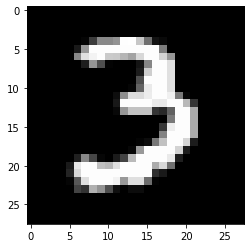

In [68]:
a=9
print("Label: " + str(y_train[a]))
plt.imshow(x_train[a].reshape((28,28)),cmap='gray')
plt.show()

In [69]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)

In [71]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.9401190476190476


In [ ]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

In [103]:
i=7839
print(prediction_validation[i])
print(y_validation[i])

5
5


# View wrong predictions

Predicted 4 as 0


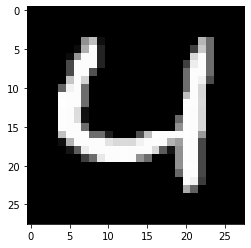

In [108]:
index=500
print("Predicted " + str(y_validation[y_validation!=prediction_validation][index]) + " as " + 
     str(prediction_validation[y_validation!=prediction_validation][index]))
plt.imshow(x_validation[y_validation!=prediction_validation][index].reshape((28,28)),cmap='gray')

In [74]:
x_test=test_file

In [75]:
#predict test data
prediction_test = clf.predict(x_test)

# View predictions for Test data

In [134]:
i=2
print(prediction_test[i])
#x_test
#x_test.iloc[index].values.reshape(28,28)

9


Predicted 4


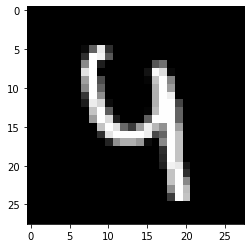

In [140]:
index=888
print("Predicted " + str(prediction_test[index]))
plt.imshow(x_test.iloc[index].values.reshape((28,28)),cmap='gray')